In [ ]:
#!pip install -U spacy==3.2.0
#Solutions for TypeError: issubclass() arg 1 must be a class
#!pip install typing-inspect==0.8.0
#!pip install typing_extensions==4.5.0

In [ ]:
#!python -m spacy download pt_core_news_lg
#!python -m spacy download 'pt_core_news_sm' -> small
#!python -m spacy download 'pt_core_news_md' -> medium
#!python -m spacy download 'pt_core_news_lg' -> large

In [1]:
import spacy

In [141]:
nlp = spacy.load("pt_core_news_lg") # Modelo pré treinado em portugues
print(type(nlp))
print(nlp.pipe_names)
#dir(nlp)
#help(nlp)

<class 'spacy.lang.pt.Portuguese'>
['tok2vec', 'morphologizer', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [22]:
doc = nlp("Houve grande queda de 60% nas ações da Magazine Luiza S.A. Sendo assim, todos os ganhos do período da pandemia foram devolvidos")

In [23]:
for token in doc:
    print(token)
print("-"*40);print(type(doc))
print("-"*40);print(len(doc.vocab))
print("-"*40);print(doc.vocab[0])
print("-"*40);print([(w.text, w.pos_) for w in doc])
print("-"*40);print([token.lemma_ for token in doc])

Houve
grande
queda
de
60
%
nas
ações
da
Magazine
Luiza
S.A.
Sendo
assim
,
todos
os
ganhos
do
período
da
pandemia
foram
devolvidos
----------------------------------------
<class 'spacy.tokens.doc.Doc'>
----------------------------------------
378
----------------------------------------
----------------------------------------
[('Houve', 'VERB'), ('grande', 'ADJ'), ('queda', 'NOUN'), ('de', 'ADP'), ('60', 'NUM'), ('%', 'SYM'), ('nas', 'ADP'), ('ações', 'NOUN'), ('da', 'ADP'), ('Magazine', 'PROPN'), ('Luiza', 'PROPN'), ('S.A.', 'PROPN'), ('Sendo', 'VERB'), ('assim', 'ADV'), (',', 'PUNCT'), ('todos', 'DET'), ('os', 'DET'), ('ganhos', 'NOUN'), ('do', 'ADP'), ('período', 'NOUN'), ('da', 'ADP'), ('pandemia', 'NOUN'), ('foram', 'AUX'), ('devolvidos', 'VERB')]
----------------------------------------
['Houve', 'grande', 'quedo', 'de', '60', '%', 'o', 'ações', 'da', 'Magazine', 'Luiza', 'S.A.', 'Sendo', 'assim', ',', 'todo', 'o', 'ganho', 'do', 'período', 'da', 'pandemia', 'ser', 'devolvido']


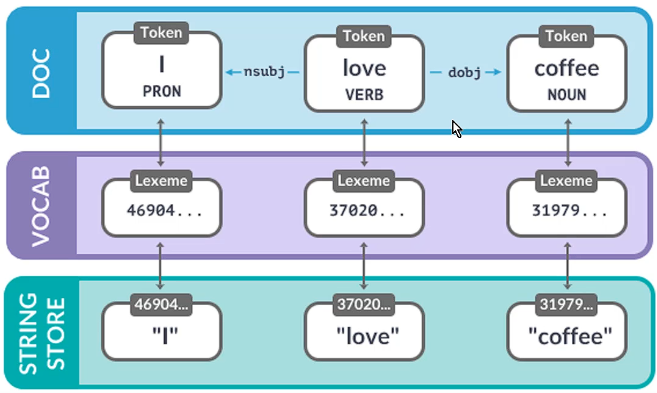

In [4]:
print("Tokens: ", [token.text for token in doc]) ; print("-"*40)
print("Stopword: ", [token.is_stop for token in doc]) ; print("-"*40)
print("Maíusculo: ", [token.is_upper for token in doc]) ; print("-"*40)
print("Pontuação: ", [token.is_punct for token in doc]); print("-"*40)
print("Número: ", [token.like_num for token in doc]); print("-"*40)
print("Sentença inicial: ", [token.is_sent_start for token in doc]); print("-"*40)

Tokens:  ['Houve', 'grande', 'queda', 'de', '60', '%', 'nas', 'ações', 'da', 'Magazine', 'Luiza', 'S.A.', 'Sendo', 'assim', ',', 'todos', 'os', 'ganhos', 'do', 'período', 'da', 'pandemia', 'foram', 'devolvidos']
----------------------------------------
Stopword:  [False, True, False, True, False, False, True, False, True, False, False, False, False, True, False, True, True, False, True, False, True, False, True, False]
----------------------------------------
Maíusculo:  [False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False]
----------------------------------------
Pontuação:  [False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False]
----------------------------------------
Número:  [False, False, False, False, True, False, False, False, False, False, False, False, Fa

In [5]:
print("Tokens: ", [token.text for token in doc]) ; print("-"*40)
print("Shape: ", [token.shape_ for token in doc]) ; print("-"*40)

Tokens:  ['Houve', 'grande', 'queda', 'de', '60', '%', 'nas', 'ações', 'da', 'Magazine', 'Luiza', 'S.A.', 'Sendo', 'assim', ',', 'todos', 'os', 'ganhos', 'do', 'período', 'da', 'pandemia', 'foram', 'devolvidos']
----------------------------------------
Shape:  ['Xxxxx', 'xxxx', 'xxxx', 'xx', 'dd', '%', 'xxx', 'xxxx', 'xx', 'Xxxxx', 'Xxxxx', 'X.X.', 'Xxxxx', 'xxxx', ',', 'xxxx', 'xx', 'xxxx', 'xx', 'xxxx', 'xx', 'xxxx', 'xxxx', 'xxxx']
----------------------------------------


In [6]:
print([(token.text,token.i) for token in doc]) ; print("-"*40)
print([(token.text,token.i) for token in doc if token.is_punct or token.like_num])

[('Houve', 0), ('grande', 1), ('queda', 2), ('de', 3), ('60', 4), ('%', 5), ('nas', 6), ('ações', 7), ('da', 8), ('Magazine', 9), ('Luiza', 10), ('S.A.', 11), ('Sendo', 12), ('assim', 13), (',', 14), ('todos', 15), ('os', 16), ('ganhos', 17), ('do', 18), ('período', 19), ('da', 20), ('pandemia', 21), ('foram', 22), ('devolvidos', 23)]
----------------------------------------
[('60', 4), ('%', 5), (',', 14)]


In [7]:
[(token.text, token.pos_, token.dep_, token.lemma_, token.shape_) for token in doc]

[('Houve', 'VERB', 'ROOT', 'Houve', 'Xxxxx'),
 ('grande', 'ADJ', 'amod', 'grande', 'xxxx'),
 ('queda', 'NOUN', 'obj', 'quedo', 'xxxx'),
 ('de', 'ADP', 'case', 'de', 'xx'),
 ('60', 'NUM', 'nummod', '60', 'dd'),
 ('%', 'SYM', 'nmod', '%', '%'),
 ('nas', 'ADP', 'case', 'o', 'xxx'),
 ('ações', 'NOUN', 'obl', 'ações', 'xxxx'),
 ('da', 'ADP', 'case', 'da', 'xx'),
 ('Magazine', 'PROPN', 'nmod', 'Magazine', 'Xxxxx'),
 ('Luiza', 'PROPN', 'flat:name', 'Luiza', 'Xxxxx'),
 ('S.A.', 'PROPN', 'flat:name', 'S.A.', 'X.X.'),
 ('Sendo', 'VERB', 'advcl', 'Sendo', 'Xxxxx'),
 ('assim', 'ADV', 'fixed', 'assim', 'xxxx'),
 (',', 'PUNCT', 'punct', ',', ','),
 ('todos', 'DET', 'det', 'todo', 'xxxx'),
 ('os', 'DET', 'det', 'o', 'xx'),
 ('ganhos', 'NOUN', 'obj', 'ganho', 'xxxx'),
 ('do', 'ADP', 'case', 'do', 'xx'),
 ('período', 'NOUN', 'nmod', 'período', 'xxxx'),
 ('da', 'ADP', 'case', 'da', 'xx'),
 ('pandemia', 'NOUN', 'nmod', 'pandemia', 'xxxx'),
 ('foram', 'AUX', 'aux:pass', 'ser', 'xxxx'),
 ('devolvidos', 'VE

In [8]:
[(token.text,token.morph) for token in doc]

[('Houve', Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin),
 ('grande', Gender=Fem|Number=Sing),
 ('queda', Gender=Fem|Number=Sing),
 ('de', ),
 ('60', NumType=Card),
 ('%', ),
 ('nas', Definite=Def|Gender=Fem|Number=Plur|PronType=Art),
 ('ações', Gender=Fem|Number=Plur),
 ('da', Definite=Def|Gender=Fem|Number=Sing|PronType=Art),
 ('Magazine', Gender=Fem|Number=Sing),
 ('Luiza', Gender=Fem|Number=Sing),
 ('S.A.', Number=Sing),
 ('Sendo', VerbForm=Ger),
 ('assim', ),
 (',', ),
 ('todos', Gender=Masc|Number=Plur|PronType=Tot),
 ('os', Definite=Def|Gender=Masc|Number=Plur|PronType=Art),
 ('ganhos', Gender=Masc|Number=Plur),
 ('do', Definite=Def|Gender=Masc|Number=Sing|PronType=Art),
 ('período', Gender=Masc|Number=Sing),
 ('da', Definite=Def|Gender=Fem|Number=Sing|PronType=Art),
 ('pandemia', Gender=Fem|Number=Sing),
 ('foram', Mood=Ind|Number=Plur|Person=3|VerbForm=Fin),
 ('devolvidos', Gender=Masc|Number=Plur|VerbForm=Part|Voice=Pass)]

In [9]:
[(token.text,token.tag_) for token in doc]

[('Houve', 'VERB'),
 ('grande', 'ADJ'),
 ('queda', 'NOUN'),
 ('de', 'ADP'),
 ('60', 'NUM'),
 ('%', 'SYM'),
 ('nas', 'ADP'),
 ('ações', 'NOUN'),
 ('da', 'ADP'),
 ('Magazine', 'PROPN'),
 ('Luiza', 'PROPN'),
 ('S.A.', 'PROPN'),
 ('Sendo', 'VERB'),
 ('assim', 'ADV'),
 (',', 'PUNCT'),
 ('todos', 'DET'),
 ('os', 'DET'),
 ('ganhos', 'NOUN'),
 ('do', 'ADP'),
 ('período', 'NOUN'),
 ('da', 'ADP'),
 ('pandemia', 'NOUN'),
 ('foram', 'AUX'),
 ('devolvidos', 'VERB')]

In [10]:
[(token.text, token.label_) for token in doc.ents]

[('Magazine Luiza S.A.', 'ORG')]

In [11]:
print([t for t in doc if t.is_stop])

[grande, de, nas, da, assim, todos, os, do, da, foram]


In [12]:
print([words for words in nlp.Defaults.stop_words])

['forma', 'quarto', 'bem', 'foi', 'número', 'ora', 'sempre', 'se', 'agora', 'fora', 'tive', 'quatro', 'uns', 'falta', 'dentro', 'além', 'custa', 'sétimo', 'pelas', 'tanta', 'tente', 'estivemos', 'muitos', 'des', 'às', 'sete', 'vós', 'os', 'pois', 'meses', 'vez', 'quero', 'inicio', 'algo', 'outra', 'mês', 'ir', 'aqui', 'através', 'fazes', 'qual', 'tivemos', 'seria', 'aqueles', 'nuns', 'do', 'próximo', 'nove', 'um', 'porquê', 'próprio', 'que', 'segundo', 'aquele', 'sexto', 'conselho', 'longe', 'ligado', 'povo', 'nossos', 'conhecida', 'ver', 'mal', 'foram', 'ele', 'dessa', 'ambas', 'oitavo', 'quê', 'aos', 'contra', 'já', 'fim', 'tentaram', 'fazem', 'último', 'na', 'isso', 'sétima', 'vocês', 'algumas', 'porém', 'outras', 'vos', 'valor', 'seus', 'primeiro', 'você', 'final', 'zero', 'aí', 'quinto', 'neste', 'antes', 'esta', 'meus', 'pontos', 'posso', 'como', 'fazia', 'meu', 'apoia', 'naquele', 'no', 'vossos', 'é', 'uma', 'próxima', 'sou', 'dos', 'da', 'seu', 'momento', 'nas', 'minhas', 'vão'

In [13]:
nlp.Defaults.stop_words.add("eita")
nlp.vocab["eita"].is_stop = True

In [14]:
nlp.vocab["eita"].is_stop

True

In [30]:
tokens = [t.text for t in doc]

stops = [s for s in nlp.Defaults.stop_words]

semstops = [t for t in tokens if t not in stops] 
semstops

['Houve',
 'queda',
 '60',
 '%',
 'ações',
 'Magazine',
 'Luiza',
 'S.A.',
 'Sendo',
 ',',
 'ganhos',
 'período',
 'pandemia',
 'devolvidos']

In [34]:
string = ' '.join(semstops)
doc2 = nlp(string)
lemma = [t.lemma_ for t in doc2]
lemma = ' '.join(lemma)
print(doc2)
print(lemma)

Houve queda 60 % ações Magazine Luiza S.A. Sendo , ganhos período pandemia devolvidos
Houve quedo 60 % ações Magazine Luiza S.A. Sendo , ganho período pandemia devolvido


In [16]:
print("Hash: ", nlp.vocab.strings["dados"])
print("Hash: ", doc.vocab.strings["dados"])
print("String: ", nlp.vocab.strings[6013848609874238634])

Hash:  6013848609874238634
Hash:  6013848609874238634
String:  dados


In [17]:
lex = nlp.vocab["dados"]
print(lex.text,lex.orth, lex.is_alpha, lex.is_lower)

dados 6013848609874238634 True True


In [18]:
print(nlp("dados").vector.shape)

(300,)


In [19]:
print(nlp("dados").vector)

[-1.8078e+00 -2.8421e+00 -5.5345e-01 -4.0565e+00 -2.3565e+00  4.7295e+00
 -3.3508e+00 -1.2036e+00 -5.3749e+00 -7.5768e-01 -2.0015e+00  5.3618e+00
  2.2789e-01  1.2136e+00 -1.4418e+00 -3.0621e+00  2.2060e+00  1.1943e+00
 -1.8689e+00 -5.9128e+00 -5.1929e-01  2.1897e+00 -2.4651e+00  1.7600e+00
 -5.6308e+00  1.0053e+00  7.3080e-01  2.0417e-01 -6.0370e+00  1.7474e+00
  2.0375e+00  2.7541e+00 -1.0423e+00  1.7632e+00 -1.4484e+00 -2.4344e+00
 -8.6094e-01  1.7867e+00 -4.9920e+00 -3.1162e+00 -5.3973e-01  2.4241e+00
  4.4410e-01 -4.7503e+00  2.1383e+00  3.8537e-01 -2.2418e+00  5.8104e+00
 -1.1731e+00  2.4686e-02 -1.8413e+00 -5.9321e+00 -7.0872e-03 -2.3093e+00
  5.5101e+00 -4.1795e-01  2.9754e+00  3.6709e-01 -8.0867e-01 -1.3751e+00
  4.8132e+00 -2.2835e+00 -2.0920e-01  1.2578e+00  4.3466e+00  1.3846e+00
 -1.5847e+00  3.3322e+00 -4.3669e+00  1.8883e+00 -1.2312e+00  3.7902e-01
  8.6331e-01 -4.0607e+00 -1.3444e+00  4.5210e+00  2.2995e-01 -5.9245e+00
 -2.0598e-01 -3.1810e+00 -3.8640e+00  7.2114e+00  3

In [20]:
"""
Esse vetor é uma representação numérica
que captura o significado do texto baseado em um modelo de palavras incorporadas (word embeddings) treinado pelo spaCy.
"""
print(nlp("dados são uma maravilha").vector)

[-0.98872006 -1.150315   -0.7611172  -1.9116024  -3.79335     1.2712514
 -2.4676628  -0.52338    -2.7406847  -2.3686266   1.0937675   1.2683825
 -0.26580006 -1.7158799  -0.16971248 -1.114715    4.11        0.37598497
 -1.22708     1.2903501  -0.65109754  2.1937935  -2.06492    -0.31522757
 -2.5016549  -0.05363746  0.59832495  1.8500175  -0.8095476   2.2367475
  0.209005    1.1403899  -2.10178    -0.16037999 -1.6044174   0.19211017
 -1.5027025   1.4068124  -2.3793273  -0.09275999 -1.1880151   0.801185
  0.51488507 -1.9591818   0.85589993  1.6691425  -2.22851     1.170595
  0.70239997  0.5117215  -1.8014275  -2.655125   -0.5670543  -1.111635
  2.357285   -0.2842625   0.7850225   0.12561499  0.5428325  -1.2245
  1.588015   -1.6064326  -0.53744227  3.0168977   1.9968749   0.01947004
  1.3364875   3.911      -1.489795    1.61305    -1.044615    0.4086975
  0.62723     0.76764756 -0.6561725  -1.4418249   1.5674926  -2.83365
 -0.76719505 -0.17597005 -0.63263005  0.7314825   0.6001288   0.6210

### Busca de Similaridade Cosseno 

#### Doc

In [36]:
doc1_sim = nlp("Ele iaja regularmente de carro")
doc2_sim = nlp("Ela regularmente viaja de avião")
print(doc1_sim.similarity(doc2_sim))

0.8197151558013337


#### Span

In [43]:
doc4_sim = nlp("Ele pede discrição. Ele pede descrição")
parteA = doc4_sim[0:3]
parteB = doc4_sim[4:7]
print(parteA.similarity(parteB))

0.9630053639411926


#### Token

In [44]:
doc3_sim = nlp("Devemos dizer comprimento ou cumprimento")
tokenA = doc3_sim[2]
tokenB = doc3_sim[4]
print(tokenA.similarity(tokenB))

0.5804340243339539


### Busca de padrão com Matcher

In [100]:
from spacy.matcher import Matcher

In [101]:
doc5_padrao = nlp("Você pode ligar para (11) - 97266378 ou (41) 998337489")
matcher = Matcher(nlp.vocab)

padrao = [{"ORTH": "("}, {"SHAPE": "dd"}, {"ORTH": ")"}, {"ORTH": "-", "OP":"?"},{"IS_DIGIT": True}]
matcher.add("telefone_padrao", [padrao])

matches = matcher(doc5_padrao)

for id, inicio, fim in matches:
    print(inicio,fim)
    print(doc5_padrao[inicio:fim])

4 9
(11) - 97266378
10 14
(41) 998337489


In [111]:
doc6_padrao = nlp("Estamos infectados com micro organismos. MICROORGANISMOS são perigosos. Não exergamos micro-organismos")
matcher = Matcher(nlp.vocab)

padrao1 = [{"LOWER": "micro-organismos"}]
padrao2 = [{"LOWER": "micro"},{"LOWER": "organismos"}]
padrao3 = [{"LOWER": "microorganismos"}]


matcher.add("micro organismos", [padrao1,padrao2,padrao3])
matches = matcher(doc6_padrao)

for id, inicio, fim in matches:
    print(doc6_padrao[inicio:fim])

micro organismos
MICROORGANISMOS
micro-organismos


### Módulo de Visualizações

In [118]:
from spacy import displacy

In [134]:
doc_view  = nlp("Eu amo jogar Tennis. Um dia irei para as olímpiadas na frança e ser patrocinada pela Coca-Cola!")

In [135]:
displacy.render(doc_view,style="ent",jupyter=True)

In [136]:

displacy.render(doc_view,style="dep",jupyter=True,options={'compact':True,"distance":90,"color": "#ffffff","bg":"#3399cc","font":'Arial'})

### Gerenciando pipelines

In [139]:
print(nlp.pipe_names)
nlp.remove_pipe('tok2vec')
print(nlp.pipe_names)

nlp.add_pipe('tok2vec',after='morphologizer')
print(nlp.pipe_names)

['tok2vec', 'morphologizer', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']
['morphologizer', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']
['morphologizer', 'tok2vec', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [142]:
teste = nlp("este é um documento")